### Pytorch computer vision

In [1]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

# Check PyTorch version
print(f"PyTorch version: {torch.__version__}")

# Check torchvision version
print(f"torchvision version: {torchvision.__version__}")

PyTorch version: 2.9.1+cu128
torchvision version: 0.24.1+cu128


### Getting a Datasets: `FashiopnMNIST`

In [2]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

# Setup test data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # Get test data
    download=True,
    transform=ToTensor()
)

In [3]:
img, label = train_data[0]
img

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [4]:
# Shape of the image
print(img.shape)

torch.Size([1, 28, 28])


In [5]:
print(len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets))

60000 60000 10000 10000


In [6]:
class_name = train_data.classes
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

### Visualizing our data

Image shape: torch.Size([1, 28, 28])
Label: 9


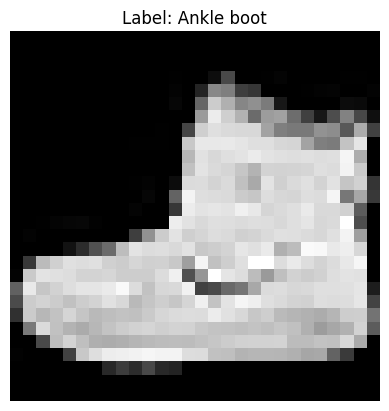

In [7]:
import matplotlib.pyplot as plt

img, label = train_data[0]
print(f"Image shape: {img.shape}")
print(f"Label: {label}")
# plt.imshow(img.permute(1, 2, 0)) # or
plt.imshow(img.squeeze(), cmap='gray')
plt.title(f"Label: {class_name[label]}")
plt.axis(False)
plt.show()

In [8]:
import torch

torch.randint(low=0, high=len(train_data), size=[1]).item()

38528

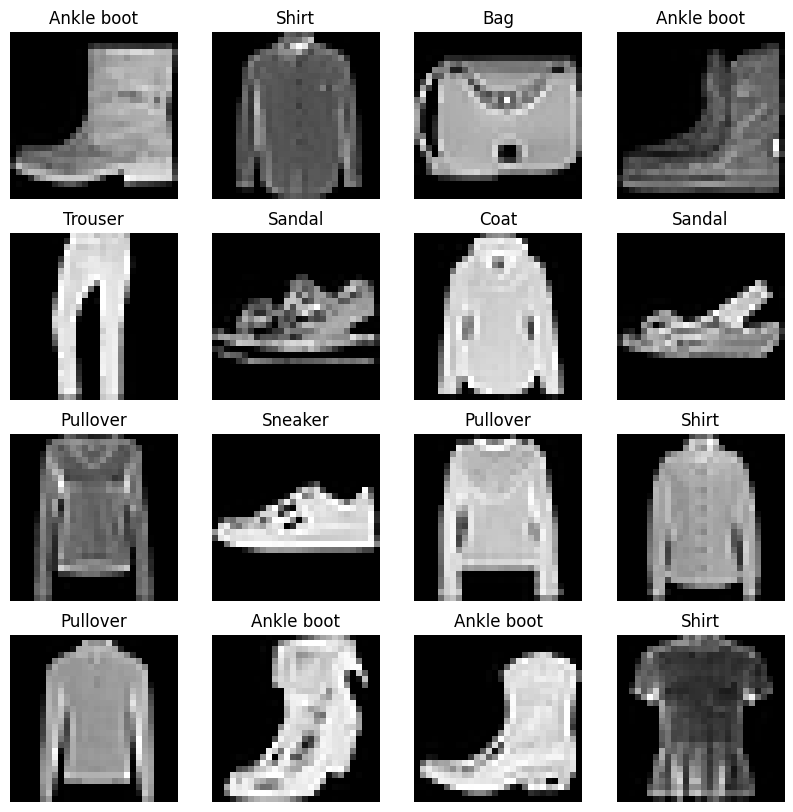

In [9]:
# plot more image_names
import torch

torch.manual_seed(42)

fig = plt.figure(figsize=(10, 10))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(f"{class_name[label]}")
    plt.axis(False)
plt.show()

### Prepare DataLoader

In [7]:
from torch.utils.data import DataLoader


BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True
                              )

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False
                             )

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x74901da0b380>, <torch.utils.data.dataloader.DataLoader object at 0x74901db2aa50>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [11]:
# Check out what's inside the trainng dataloader

img, lable = next(iter(train_dataloader))
img.shape, label

(torch.Size([32, 1, 28, 28]), 6)

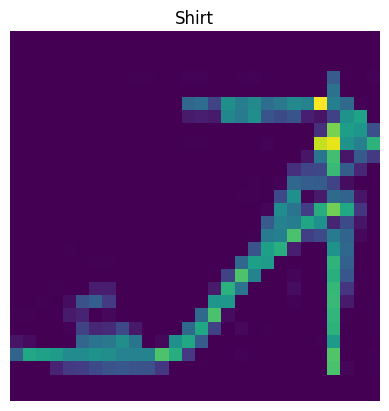

In [12]:
# Show a sample
ima, lable = next(iter(train_dataloader))

plt.imshow(img[0].squeeze());
plt.title(class_name[label])
plt.axis(False)
plt.show()

### Build a baseline model

In [13]:
img.shape

torch.Size([32, 1, 28, 28])

In [14]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [15]:
# Create a flatten later
from torch import  nn

flatten_model = nn.Flatten() # all nn modules function as a model (can do a forward pass)


In [16]:
x = train_features_batch[0]
# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

# Try uncommenting below and see what happens
#print(x)
#print(output)

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [17]:
train_features_batch[0].shape

torch.Size([1, 28, 28])

In [18]:
flatten_model = nn.Flatten()

flatten_model(train_features_batch[0]).shape[1]

784

In [19]:
train_features_batch[1].shape[-1]*train_features_batch[0].shape[1]

784

In [ ]:
# Build a model
from torch import  nn

class FashionMNISTModel(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.stack_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.stack_layer(x)

input_shape = train_features_batch[1].shape[-1]*train_features_batch[0].shape[1]
output_shape = len(train_dataloader.dataset.classes)
hidden_units=10
model_1 = FashionMNISTModel(input_shape=input_shape,
            output_shape=output_shape,
            hidden_units=hidden_units)

model_1

FashionMNISTModel(
  (stack_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [22]:
# Set loss and optimizer and evaluation metrics
from helper_functions import  accuracy_fn
from torch import nn
import torch

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.001)

In [15]:
from timeit import default_timer as timer 
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [24]:
model_1(train_features_batch[0])

tensor([[ 0.3680, -0.0491, -0.1733,  0.2394, -0.3368,  0.3939, -0.1754,  0.1959,
          0.1051,  0.1883]], grad_fn=<AddmmBackward0>)

In [25]:
train_labels_batch[0]

tensor(9)

In [26]:
# %pip install tqdm

In [27]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# set manual seed
torch.manual_seed(42)

train_time_start_on_cpu = timer()

# Set the number of epochs
epochs = 5

for epoch in tqdm(range(epochs)):

    # Training
    print(f"Epoch: {epoch}\n----------")
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(train_dataloader):
        model_1.train()

        # 1. Forward pass
        y_pred = model_1(X)
        # Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss +=  loss # accumulatively add up the loss per epoch 

        # Calculate accuracy
        acc = accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        train_acc += acc

        # Optimizer zero grad
        optimizer.zero_grad()

        # Backpropagation
        loss.backward()

        # Set optimizer
        optimizer.step()

        # Print out what's happening
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
        
    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)

    ## Testing
    # Setup variables for accumulatively adding up loss and accuracy 
    test_loss, test_acc = 0, 0
    model_1.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            test_pred = model_1(X)
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_pred=test_pred.argmax(dim=1), y_true=y)
            
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)
        
    # Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | train Acc: {train_acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")


# Calculate training time      
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_1.parameters()).device))

/home/kamal/anaconda3/envs/myenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
----------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 20%|██        | 1/5 [00:40<02:43, 40.95s/it]


Train loss: 1.91309 | train Acc: 48.32% | Test loss: 1.50186, Test acc: 61.58%

Epoch: 1
----------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 40%|████      | 2/5 [01:15<01:50, 36.98s/it]


Train loss: 1.21838 | train Acc: 65.61% | Test loss: 1.05110, Test acc: 66.00%

Epoch: 2
----------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 60%|██████    | 3/5 [01:57<01:18, 39.31s/it]


Train loss: 0.95849 | train Acc: 68.41% | Test loss: 0.90771, Test acc: 68.58%

Epoch: 3
----------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 80%|████████  | 4/5 [02:29<00:36, 36.71s/it]


Train loss: 0.85315 | train Acc: 71.12% | Test loss: 0.83123, Test acc: 71.48%

Epoch: 4
----------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


100%|██████████| 5/5 [03:13<00:00, 38.79s/it]


Train loss: 0.78756 | train Acc: 73.69% | Test loss: 0.77739, Test acc: 73.23%

Train time on cpu: 193.958 seconds


### Make predictions

In [28]:
model_1.state_dict()

OrderedDict([('stack_layer.1.weight',
              tensor([[ 0.0034, -0.0353,  0.0322,  ..., -0.0152, -0.0155,  0.0070],
                      [ 0.0097,  0.0137,  0.0197,  ..., -0.0254,  0.0117, -0.0214],
                      [-0.0112, -0.0170, -0.0242,  ...,  0.0055, -0.0152, -0.0092],
                      ...,
                      [-0.0231,  0.0100,  0.0303,  ...,  0.0055, -0.0132, -0.0141],
                      [-0.0112,  0.0124,  0.0062,  ...,  0.0006, -0.0286,  0.0320],
                      [ 0.0080,  0.0258,  0.0155,  ..., -0.0299, -0.0364, -0.0014]])),
             ('stack_layer.1.bias',
              tensor([ 0.1704, -0.0810,  0.0563,  0.0385,  0.0214, -0.0455, -0.0299,  0.0059,
                       0.0538, -0.0201])),
             ('stack_layer.2.weight',
              tensor([[-0.5098, -0.1003,  0.4851, -0.5819,  0.3845,  0.0623,  0.1363,  0.0691,
                        0.1695, -0.2712],
                      [ 0.1920, -0.3830, -0.0985, -0.3997, -0.1830,  0.5797, -0.

In [29]:
model_1.__class__.__name__

'FashionMNISTModel'

In [30]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn):

    loss, acc = 0, 0
    
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            y_pred = model(X)

            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))

        loss /= len(data_loader)
        acc /= len(data_loader) 

    return {
        "model_name": model.__class__.__name__,
        "model_loss": loss.item(),
        "model_acc": acc
    }

In [36]:
model_1_result = eval_model(model=model_1,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)

model_1_result

{'model_name': 'FashionMNISTModel',
 'model_loss': 0.7773920893669128,
 'model_acc': 73.23282747603834}

### Testing predictions

In [46]:
image, label = test_dataloader.dataset[0]
label

9

In [57]:
predicted = model_1(image)
# predicted = torch.argmax(predicted, dim=1)[0] # or
predicted = predicted.argmax(dim=1)[0]
predicted

tensor(9)

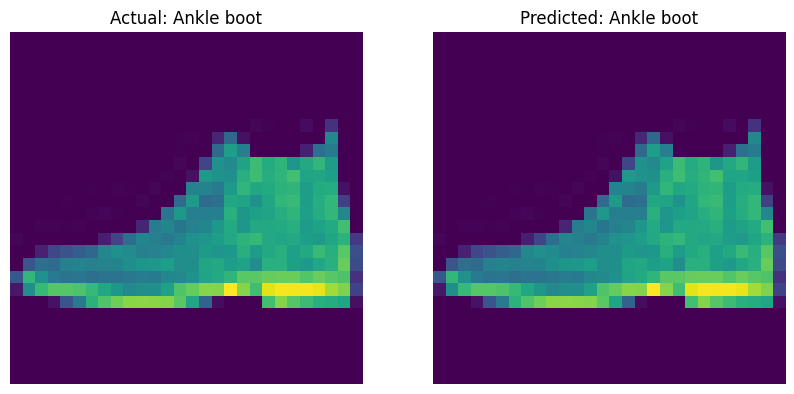

In [62]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title(f"Actual: {class_name[label]}")
plt.imshow(image.permute(1, 2, 0))
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title(f"Predicted: {class_name[predicted]}")
plt.imshow(image.permute(1, 2, 0))
plt.axis("off")
plt.show()

#### Setup device agnostic code

In [248]:
# Setup device agnostic code
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [257]:
# Create a model with linear and non linear layers
class FashionMNISTModelV1(nn.Module):

    def __init__(self, input_shape: int,
                 output_shape: int, 
                 hidden_units: int = 8):

        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )
    
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)
    

In [258]:
torch.manual_seed(42)

model_2 = FashionMNISTModelV1(input_shape=784,
                             hidden_units=8, 
                             output_shape=10).to(device)

model_2

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=8, bias=True)
    (2): ReLU()
    (3): Linear(in_features=8, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [259]:
# check the initialized device to the model
next(model_2.parameters()).device

device(type='cpu')

In [260]:
# Setup loss and accuracy metrics
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.001)

In [261]:
# create a fucntion for training step
def train_step(model: torch.nn.Module,
                data_loader: torch.utils.data.DataLoader,
                loss_fn: torch.nn.Module,
                optimizer: torch.optim.Optimizer,
                accuracy_fn,
                device: torch.device = device):
  
    train_loss, train_acc = 0, 0
    model.to(device)
    model.train()

    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)

        # Forward pass
        y_pred= model(X)

        # Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1))

        # Optimizer zero grad
        optimizer.zero_grad()

        # Backpropagation
        loss.backward()

        # Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)

    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(model: torch.nn.Module,
                data_loader: torch.utils.data.DataLoader,
                loss_fn: torch.nn.Module,
                accuracy_fn,
                device: torch.device = device):

    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval()
    with torch.inference_mode():

        for X, y in data_loader:

            X, y = X.to(device), y.to(device)

            test_pred = model(X)
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        test_loss /= len(data_loader)
        test_acc /= len(data_loader)

    print(f"Test Loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%")

In [262]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 8

for epoch in range(epochs):
    print(f"Epochs: {epoch}\n----------")

    train_step(model=model_2,
    data_loader=train_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    optimizer=optimizer)

    test_step(model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn)


train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

Epochs: 0
----------
Train loss: 2.24080 | Train accuracy: 15.07%
Test Loss: 2.15475 | Test accuracy: 24.20%
Epochs: 1
----------
Train loss: 2.00713 | Train accuracy: 33.45%
Test Loss: 1.80866 | Test accuracy: 37.91%
Epochs: 2
----------
Train loss: 1.65070 | Train accuracy: 44.65%
Test Loss: 1.52838 | Test accuracy: 48.24%
Epochs: 3
----------
Train loss: 1.44234 | Train accuracy: 50.39%
Test Loss: 1.38448 | Test accuracy: 50.52%
Epochs: 4
----------
Train loss: 1.33343 | Train accuracy: 51.81%
Test Loss: 1.30631 | Test accuracy: 51.18%
Epochs: 5
----------
Train loss: 1.27004 | Train accuracy: 53.07%
Test Loss: 1.25613 | Test accuracy: 52.78%
Epochs: 6
----------
Train loss: 1.22729 | Train accuracy: 54.11%
Test Loss: 1.22053 | Test accuracy: 53.80%
Epochs: 7
----------
Train loss: 1.19542 | Train accuracy: 55.37%
Test Loss: 1.19365 | Test accuracy: 54.91%
Train time on cpu: 265.861 seconds


#### Save the model and load

In [271]:
from pathlib import Path
import os

MODEL_DIR = Path("models_vision")
MODEL_NAME = "fashion_mnist_model_v1.pth"

MODEL_PATH = MODEL_DIR / MODEL_NAME

try:
    os.mkdir(MODEL_DIR)
    print(f"Created directory {MODEL_DIR}")
except FileExistsError:
    print(f"Directory {MODEL_DIR} already exists")
    torch.save(obj=model_2.state_dict(), f=MODEL_PATH)
    print(f"Saved model to {MODEL_PATH}")

Directory models_vision already exists
Saved model to models_vision/fashion_mnist_model_v1.pth


In [272]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn):

    loss, acc = 0, 0
    
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            y_pred = model(X)

            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))

        loss /= len(data_loader)
        acc /= len(data_loader) 

    return {
        "model_name": model.__class__.__name__,
        "model_loss": loss.item(),
        "model_acc": acc
    }

In [273]:
model_2_result = eval_model(model=model_2,
           data_loader=test_dataloader,
           loss_fn=loss_fn,
           accuracy_fn=accuracy_fn)

model_2_result

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 1.1936514377593994,
 'model_acc': 54.912140575079874}

In [275]:
# Load saved model
loaded_model_2 = FashionMNISTModelV1(input_shape=784, output_shape=10)
loaded_model_2.load_state_dict(torch.load(f=MODEL_PATH, weights_only=True))
loaded_model_2.eval()

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=8, bias=True)
    (2): ReLU()
    (3): Linear(in_features=8, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [276]:
eval_model(model=loaded_model_2,
           data_loader=test_dataloader,
           loss_fn=loss_fn,
           accuracy_fn=accuracy_fn)

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 1.1936514377593994,
 'model_acc': 54.912140575079874}

In [51]:
img, label = next(iter(test_dataloader))
print(img.shape, label.shape)

torch.Size([32, 1, 28, 28]) torch.Size([32])


In [62]:
def predict_image(img, model, label, device):
    model.eval()
    with torch.inference_mode():
        img = img.to(device)
        pred = model(img)
        pred = pred.argmax(dim=1)
    return {
        "Actual": label.item(),
        "Predicted": pred.item()
    }

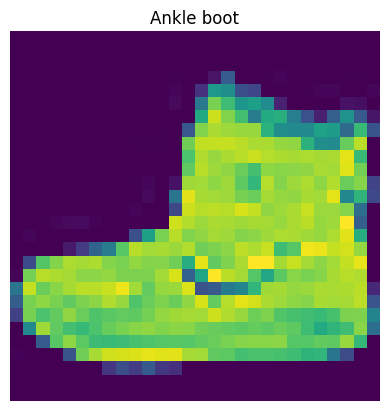

In [102]:
image, label = train_dataloader.dataset[0]
plt.imshow(image.permute(1, 2, 0))
plt.title(class_name[label])
plt.axis("off")
plt.show()

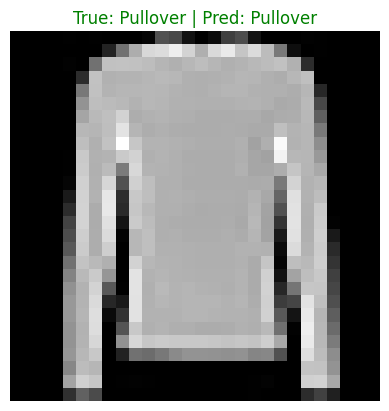

In [153]:
import torch
import matplotlib.pyplot as plt

def plot_and_predict_random_image(model: torch.nn.Module, 
                                  dataloader: torch.utils.data.DataLoader,
                                  class_names: list = None):
    # 1. Access the dataset inside the dataloader for indexing
    dataset = dataloader.dataset
    img_idx = torch.randint(low=0, high=len(dataset), size=[1]).item()
    image, label = dataset[img_idx]

    # 2. Prepare model for inference
    model.eval()
    with torch.inference_mode():
        # Add batch dimension [1, 1, 28, 28] and send to same device as model
        image_prediction = image.unsqueeze(0)
        
        # Get raw logits and convert to prediction label
        logits = model(image_prediction)
        pred_label = torch.argmax(logits, dim=1).item()

    # 3. Plot image
    # FashionMNIST is (1, 28, 28), permute to (28, 28, 1) for matplotlib
    plt.imshow(image.permute(1, 2, 0), cmap="gray")
    
    # Use class names if provided, otherwise use raw label numbers
    title_obj = f"True: {label} | Pred: {pred_label}"
    if class_names:
        title_obj = f"True: {class_names[label]} | Pred: {class_names[pred_label]}"
    
    plt.title(title_obj, color="green" if label == pred_label else "red")
    plt.axis(False)
    plt.show()

# Example usage:
plot_and_predict_random_image(model=loaded_model,
                              dataloader=test_dataloader,
                              class_names=class_name)


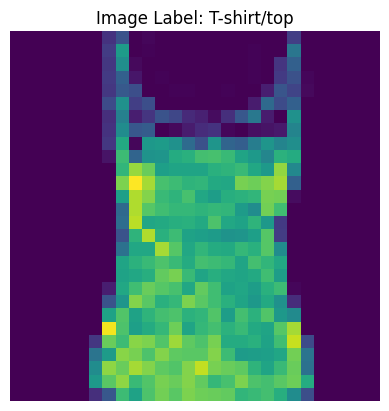

In [154]:
img_idx = torch.randint(low=0, high=len(train_dataloader), size=[1]).item()

image, label = train_dataloader.dataset[img_idx]
plt.imshow(image.permute(1, 2, 0))
plt.title(f"Image Label: {class_name[label]}")
plt.axis(False)
plt.show()

### Building a convolutional neural network (CNN) for image classification

In [233]:
from torch import nn
import torch

class FashoinMNISTModuleV2(nn.Module):
    def __init__(self, input_shape: int, output_shape: int, hidden_units: int):
        super().__init__()

        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                    out_channels=hidden_units, 
                    kernel_size=3, 
                    stride=1,
                    padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                    out_channels=hidden_units, 
                    kernel_size=3, 
                    stride=1, 
                    padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, 
                    out_channels=hidden_units, 
                    kernel_size=3,
                    padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                    out_channels=hidden_units, 
                    kernel_size=3, 
                    padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

In [219]:
train_dataloader.dataset[0][0].shape

torch.Size([1, 28, 28])

In [234]:
torch.manual_seed(42)

model_3 = FashoinMNISTModuleV2(input_shape=1,
                                hidden_units=10,
                                output_shape=len(class_name)).to(device)

model_3

FashoinMNISTModuleV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [208]:
torch.manual_seed(42)

# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(32, 3, 64, 64)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image for testing
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]") 
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

In [168]:
torch.manual_seed(42)

# Create a convolutional layer with same dimensions as TinyVGG 
# (try changing any of the parameters and see what happens)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0) # also try using "valid" or "same" here 

# Pass the data through the convolutional layer
conv_layer(test_image) # Note: If running PyTorch <1.11.0, this will error because of shape issues (nn.Conv.2d() expects a 4d tensor as input) 

[W103 15:01:35.447151818 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.


tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
         [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
         [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
         ...,
         [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
         [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
         [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

        [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
         [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
         [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
         ...,
         [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
         [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
         [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

        [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
         [ 0.8117,  0.3191, -0.0157,  ...,  1

In [169]:
# Add extra dimension to test image
test_image.unsqueeze(dim=0).shape

torch.Size([1, 3, 64, 64])

In [170]:
torch.manual_seed(42)
# Create a new conv_layer with different values (try setting these to whatever you like)
conv_layer_2 = nn.Conv2d(in_channels=3, # same number of color channels as our input image
                         out_channels=10,
                         kernel_size=(5, 5), # kernel is usually a square so a tuple also works
                         stride=2,
                         padding=0)

# Pass single image through new conv_layer_2 (this calls nn.Conv2d()'s forward() method on the input)
conv_layer_2(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 30, 30])

In [171]:
# Check out the conv_layer_2 internal parameters
print(conv_layer_2.state_dict())

OrderedDict({'weight': tensor([[[[ 0.0883,  0.0958, -0.0271,  0.1061, -0.0253],
          [ 0.0233, -0.0562,  0.0678,  0.1018, -0.0847],
          [ 0.1004,  0.0216,  0.0853,  0.0156,  0.0557],
          [-0.0163,  0.0890,  0.0171, -0.0539,  0.0294],
          [-0.0532, -0.0135, -0.0469,  0.0766, -0.0911]],

         [[-0.0532, -0.0326, -0.0694,  0.0109, -0.1140],
          [ 0.1043, -0.0981,  0.0891,  0.0192, -0.0375],
          [ 0.0714,  0.0180,  0.0933,  0.0126, -0.0364],
          [ 0.0310, -0.0313,  0.0486,  0.1031,  0.0667],
          [-0.0505,  0.0667,  0.0207,  0.0586, -0.0704]],

         [[-0.1143, -0.0446, -0.0886,  0.0947,  0.0333],
          [ 0.0478,  0.0365, -0.0020,  0.0904, -0.0820],
          [ 0.0073, -0.0788,  0.0356, -0.0398,  0.0354],
          [-0.0241,  0.0958, -0.0684, -0.0689, -0.0689],
          [ 0.1039,  0.0385,  0.1111, -0.0953, -0.1145]]],


        [[[-0.0903, -0.0777,  0.0468,  0.0413,  0.0959],
          [-0.0596, -0.0787,  0.0613, -0.0467,  0.0701],


In [172]:
# Get shapes of weight and bias tensors within conv_layer_2
print(f"conv_layer_2 weight shape: \n{conv_layer_2.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]")
print(f"\nconv_layer_2 bias shape: \n{conv_layer_2.bias.shape} -> [out_channels=10]")

conv_layer_2 weight shape: 
torch.Size([10, 3, 5, 5]) -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]

conv_layer_2 bias shape: 
torch.Size([10]) -> [out_channels=10]


In [173]:
# Print out original image shape without and with unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}")

# Create a sample nn.MaxPoo2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


[W103 15:04:06.713997018 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.


In [174]:
torch.manual_seed(42)
# Create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"Random tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2) # see what happens when you change the kernel_size value 

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n{max_pool_tensor} <- this is the maximum value from random_tensor")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
tensor([[[[0.3367]]]]) <- this is the maximum value from random_tensor
Max pool tensor shape: torch.Size([1, 1, 1, 1])


In [235]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(), 
                             lr=0.1)

In [236]:
torch.manual_seed(42)
from tqdm.auto import tqdm

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model 
epochs = 8
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_3, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_3,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.58762 | Train accuracy: 78.67%


 12%|█▎        | 1/8 [02:24<16:48, 144.10s/it]

Test Loss: 0.38958 | Test accuracy: 86.12%
Epoch: 1
---------
Train loss: 0.35866 | Train accuracy: 87.12%


 25%|██▌       | 2/8 [05:36<17:13, 172.23s/it]

Test Loss: 0.34196 | Test accuracy: 87.47%
Epoch: 2
---------
Train loss: 0.32303 | Train accuracy: 88.21%


 38%|███▊      | 3/8 [08:59<15:33, 186.67s/it]

Test Loss: 0.32659 | Test accuracy: 88.32%
Epoch: 3
---------
Train loss: 0.30245 | Train accuracy: 88.94%


 50%|█████     | 4/8 [12:10<12:32, 188.04s/it]

Test Loss: 0.32928 | Test accuracy: 87.51%
Epoch: 4
---------
Train loss: 0.28897 | Train accuracy: 89.43%


 62%|██████▎   | 5/8 [15:43<09:51, 197.16s/it]

Test Loss: 0.29861 | Test accuracy: 89.49%
Epoch: 5
---------
Train loss: 0.27783 | Train accuracy: 89.92%


 75%|███████▌  | 6/8 [19:13<06:43, 201.54s/it]

Test Loss: 0.31063 | Test accuracy: 89.00%
Epoch: 6
---------
Train loss: 0.27132 | Train accuracy: 90.14%


 88%|████████▊ | 7/8 [22:33<03:20, 200.97s/it]

Test Loss: 0.30361 | Test accuracy: 89.09%
Epoch: 7
---------
Train loss: 0.26562 | Train accuracy: 90.31%


100%|██████████| 8/8 [25:58<00:00, 194.87s/it]

Test Loss: 0.28978 | Test accuracy: 89.38%
Train time on cpu: 1558.994 seconds


In [240]:
eval_model(model=model_3,
           data_loader=test_dataloader,
           loss_fn=loss_fn,
           accuracy_fn=accuracy_fn)

{'model_name': 'FashoinMNISTModuleV2',
 'model_loss': 0.2897845506668091,
 'model_acc': 89.37699680511182}

In [239]:
from pathlib import Path
import os

MODEL_DIR = Path("conv2d_models")
MODEL_NAME = "fashion_mnist_conv2d_model_v3.pth"

MODEL_PATH = MODEL_DIR / MODEL_NAME

if MODEL_DIR not in os.listdir():
    os.mkdir(MODEL_DIR)
    print(f"Created directory {MODEL_DIR}")

torch.save(obj=model_3.state_dict(), f=MODEL_PATH)
print(f"Saved model to {MODEL_PATH}")

Created directory conv2d_models
Saved model to conv2d_models/fashion_mnist_conv2d_model_v3.pth


In [243]:
# Load the conv2d model
loaded_model = FashoinMNISTModuleV2(input_shape=1,
                                hidden_units=10,
                                output_shape=len(class_name)).to(device)

loaded_model.load_state_dict(torch.load(f=MODEL_PATH, weights_only=True))
loaded_model.eval()

FashoinMNISTModuleV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [245]:
model_3_result = eval_model(model=loaded_model,
           data_loader=test_dataloader,
           loss_fn=loss_fn,
           accuracy_fn=accuracy_fn)

model_3_result

{'model_name': 'FashoinMNISTModuleV2',
 'model_loss': 0.2897845506668091,
 'model_acc': 89.37699680511182}

### Compare model result and training time

In [280]:
import pandas as pd

compared_result = pd.DataFrame([model_2_result, model_3_result])
compared_result

,model_name,model_loss,model_acc
0,FashionMNISTModelV1,1.193651,54.912141
1,FashoinMNISTModuleV2,0.289785,89.376997


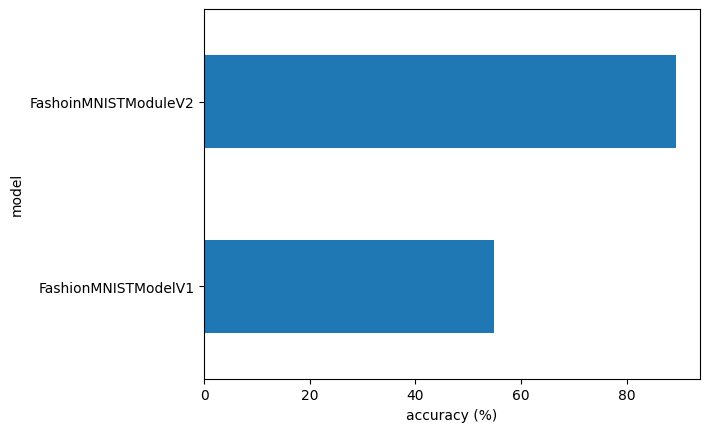

In [285]:
# Visualize our model results
compared_result.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

### Make random prediction

In [313]:
test_dataloader.dataset[0][0].shape

torch.Size([1, 28, 28])

[W103 17:26:31.487528081 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W103 17:26:31.488326876 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W103 17:26:31.488737902 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W103 17:26:31.489600901 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.


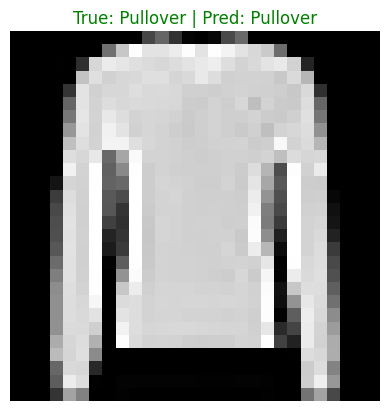

In [310]:
plot_and_predict_random_image(model=model_3, 
                                dataloader=test_dataloader, 
                                class_names=class_name)

In [329]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_name[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [330]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())
            
    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [331]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_3, 
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

[W103 17:31:48.028563155 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W103 17:31:48.032335160 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W103 17:31:48.033112885 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W103 17:31:48.033599026 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W103 17:31:48.034285395 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W103 17:31:48.034479151 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W103 17:31:48.035126222 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W103 17:31:48.035353056 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W103 17:31:48.035828876 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W103 17:31:48.036069088 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W103 17:3

tensor([[6.9277e-09, 1.6147e-09, 5.7932e-09, 5.5025e-10, 1.5369e-08, 9.9939e-01,
         8.7475e-08, 1.0361e-05, 1.0854e-06, 6.0043e-04],
        [8.8046e-03, 9.1834e-01, 4.0678e-04, 3.1747e-02, 2.9112e-02, 1.2659e-05,
         9.5968e-03, 3.9415e-05, 3.5316e-04, 1.5834e-03]])

In [332]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_3, 
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

[W103 17:31:51.039679599 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W103 17:31:51.040827744 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W103 17:31:51.041744561 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W103 17:31:51.042109301 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W103 17:31:51.044307831 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W103 17:31:51.044607326 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W103 17:31:51.045392629 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W103 17:31:51.045650326 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W103 17:31:51.046587038 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W103 17:31:51.046837302 NNPACK.cpp:56] Could not initialize NNPACK! Reason: Unsupported hardware.
[W103 17:3

tensor([[6.9277e-09, 1.6147e-09, 5.7932e-09, 5.5025e-10, 1.5369e-08, 9.9939e-01,
         8.7475e-08, 1.0361e-05, 1.0854e-06, 6.0043e-04],
        [8.8046e-03, 9.1834e-01, 4.0678e-04, 3.1747e-02, 2.9112e-02, 1.2659e-05,
         9.5968e-03, 3.9415e-05, 3.5316e-04, 1.5834e-03]])

In [333]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 6, 4, 7, 1])

In [334]:
# Are our predictions in the same form as our test labels? 
test_labels, pred_classes

([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 1, 7, 4, 3, 6, 4, 7, 1]))

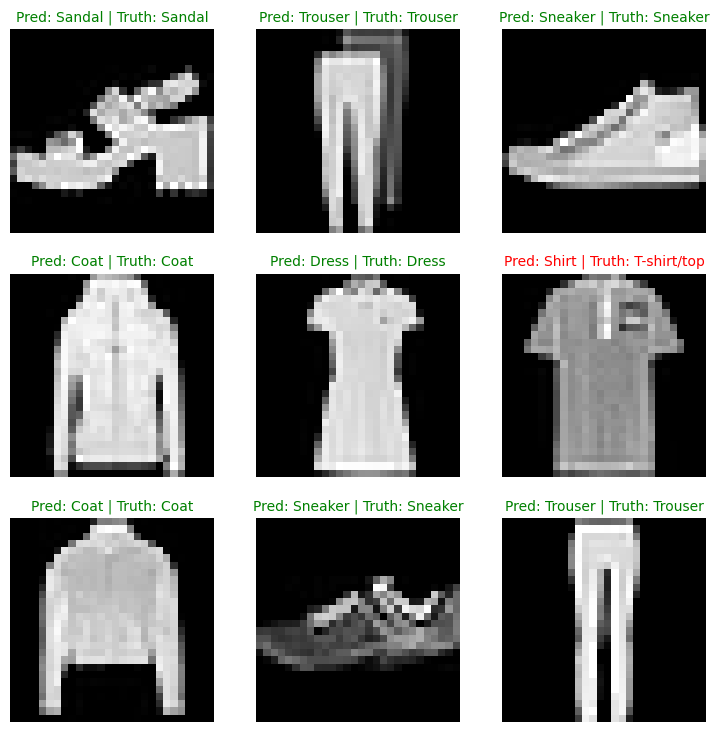

In [335]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_name[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_name[test_labels[i]] 

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  
  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

### Making a confusion matrix for future prediction

In [340]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_3.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_3(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions: 100%|██████████| 313/313 [00:06<00:00, 48.74it/s]


In [341]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

/home/kamal/anaconda3/envs/myenv/lib/python3.12/site-packages/torchmetrics/utilities/imports.py:23: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


mlxtend version: 0.24.0


In [342]:
# Import mlxtend upgraded version
import mlxtend 
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.24.0


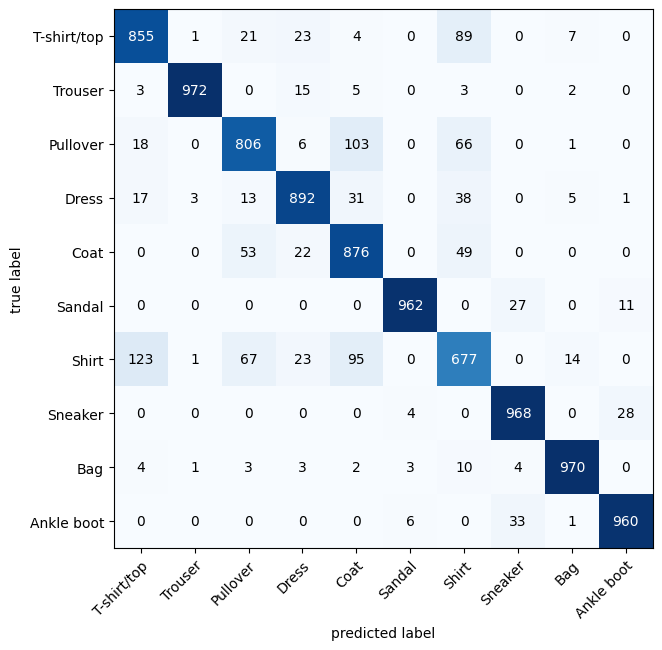

In [345]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_name), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_name, # turn the row and column labels into class names
    figsize=(10, 7)
);

## Save and load best performing model

In [349]:
from pathlib import Path

# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "03_pytorch_computer_vision_model_3.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_3.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_3.pth


In [ ]:

model_3 = FashoinMNISTModuleV2(input_shape=1,
                                hidden_units=10,
                                output_shape=len(class_name)).to(device)

model_3

In [351]:
# Create a new instance of FashionMNISTModelV2 (the same class as our saved state_dict())
# Note: loading model will error if the shapes here aren't the same as the saved version
loaded_model_3 = FashoinMNISTModuleV2(input_shape=1, 
                                    hidden_units=10, # try changing this to 128 and seeing what happens 
                                    output_shape=len(class_name)).to(device) 

# Load in the saved state_dict()
loaded_model_3.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to GPU
loaded_model_3 = loaded_model_3.to(device)

In [352]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_3,
    data_loader=test_dataloader,
    loss_fn=loss_fn, 
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

{'model_name': 'FashoinMNISTModuleV2',
 'model_loss': 0.2897845506668091,
 'model_acc': 89.37699680511182}

In [353]:
model_3_result

{'model_name': 'FashoinMNISTModuleV2',
 'model_loss': 0.2897845506668091,
 'model_acc': 89.37699680511182}

### Checkout if the two tesnfors are close to each other

In [359]:
# Check to see if results are close to each other (if they are very far away, there may be an error)
torch.isclose(torch.tensor(model_3_result["model_loss"]), 
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance

tensor(True)